# Workspace

A workspace contains the current state: the *active config*, the *active scorestructure*,
the *audio engine*, etc. Many actions, like note playback, notation rendering, etc.,
use the active workspace to determine tempo, score structure, default playback instrument,
etc.


## Contents

* [The active workspace](#The-active-workspace)
* [Parts of a Workspace](#Parts-of-a-Workspace)
    * [Active Config](#The-active-Config)
    * [Environment](#Environment)
    * [Dynamics](#Dynamics)
* [Testing Dynamics: Berio's "O King"](#Testing-dynamics)

In [1]:
from maelzel.core import *


## The active workspace

To customize a Workspace for a specific task there are three slightly different methods:

### 1. Modify the active Workspace

We customize the workspace by modifying its configuration

In [2]:
w = getWorkspace()


In [3]:
w.config['show.flagStyle'] = 'straight'
w.config['show.staffSize'] = 10

### 2. Create a new config

Instead of modifying the configuration one can create a new configuration.

In [5]:
config = CoreConfig({'play.numChannels': 4, 'quant.complexity': 'high'}, active=True)
assert config is w.config

### 3. Create a new Workspace with the needed customizations

It is also possible to have multiple workspaces. 

In [6]:
w = Workspace(scorestruct=ScoreStruct((3, 4), tempo=72),
              updates={'play.numChannels': 4,
                       'show.pngResolution': 300,
                       'quant.complexity': 'high'}, active=True)
w

Workspace(scorestruct=ScoreStruct(3/4, tempo=72), config={'show.pngResolution': 300, 'play.instr': '.piano', 'play.numChannels': 4}, dynamicCurve=DynamicCurve(shape=expon(0.3), mindb=-60.0, maxdb=0.0))

### 4. Temporary Workspace (as context manager)

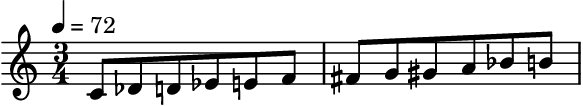

OfflineRenderer(sr=44100)
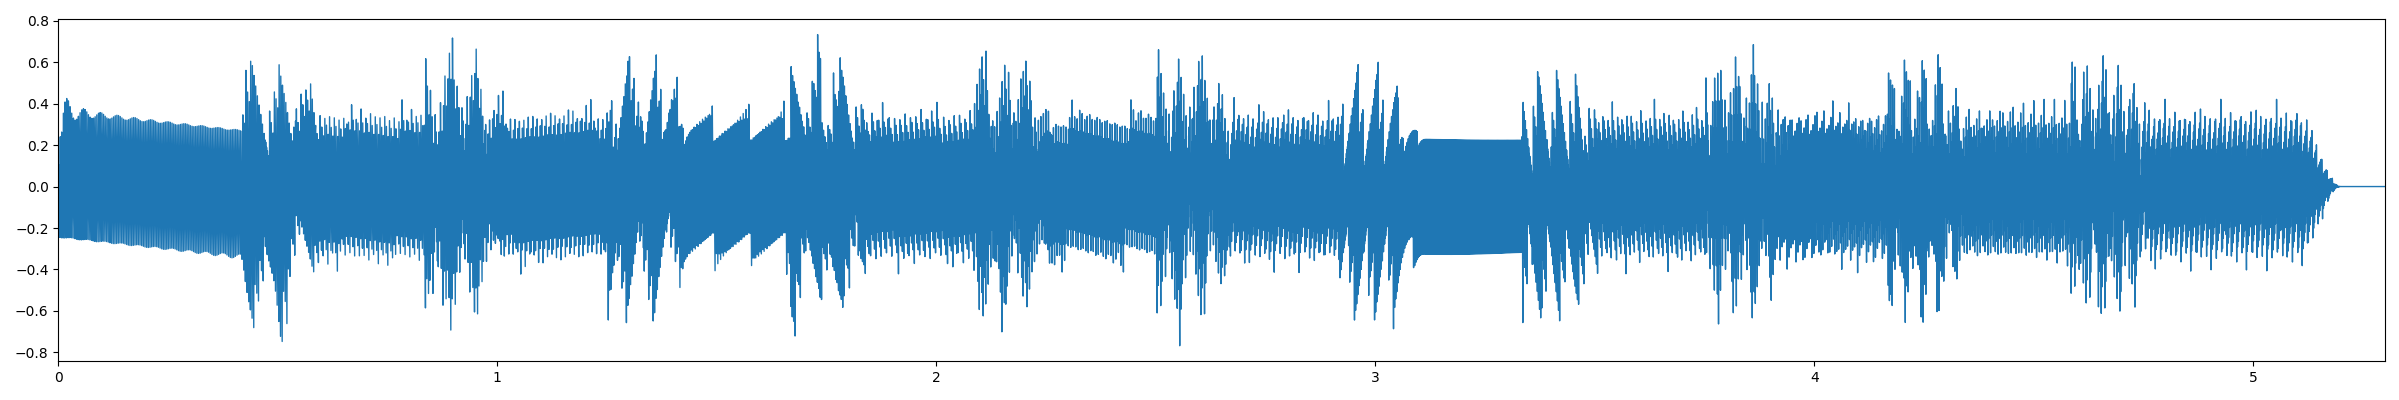

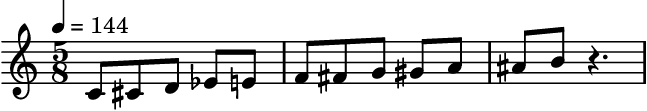

OfflineRenderer(sr=44100)
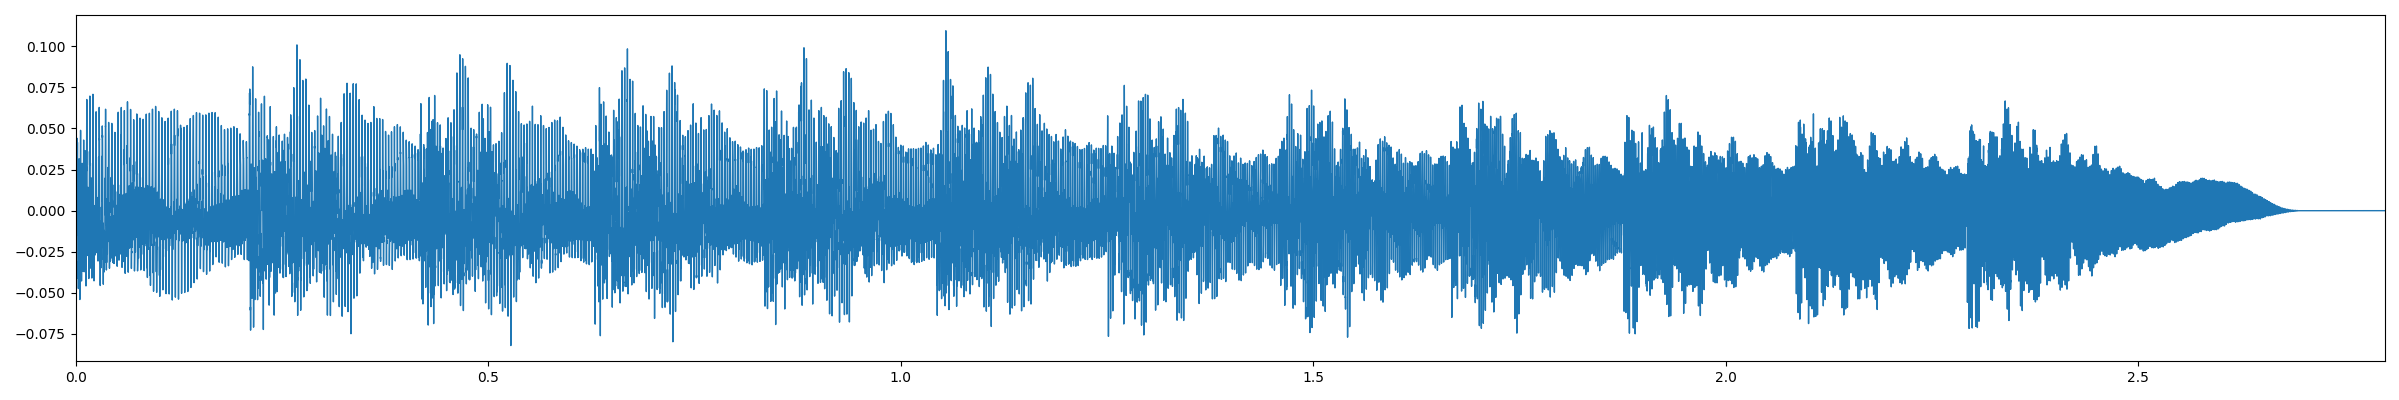

In [9]:
scale = Chain(Note(m, dur=0.5) for m in range(60, 72))
    
with Workspace(scorestruct=ScoreStruct((3, 4), tempo=72), updates={'play.instr': 'saw'}):
    scale.show()
    scale.rec(nchnls=1, sustain=0.2, fade=(0, 0.1)).show()

with Workspace(scorestruct=ScoreStruct((5, 8), tempo=144), updates={'play.instr': '.piano'}):
    scale.show()
    scale.rec(nchnls=1, sustain=0.2, fade=(0, 0.1)).show()
    

-----

## Parts of a Workspace

The workspace bundles the different elements which determine playback, notation and general behaviour of **maelzel.core**

* `.config`: holds the active configuration
* `.scorestruct`: the active score structure
* `.dynamicCurve`: determines the mapping between amplitude and musical dynamic. This is used for playback and transcription
* `.a4`: the reference frequency for A4
* `.renderer`: used internally when rendering offline. When an object (note, chord, voice, …) is played it uses this attribute to check how to route the generated playback events

### The active Config

The `.config` attribute of the active Workspace holds the active configuration. This is an instance of `CoreConfig`, which is itself a subclass of `dict` and holds defaults and customizations regarding playback, notation, etc

In [10]:
config = getWorkspace().config
config

Key,Value,Type,Descr
A4,442,between 10 - 10000,"Freq of A4. Normal values are between 440-443, but any value can be used"
dynamicCurveDynamics,ppp pp p mp mf f ff fff,type: str,"Possible dynamic steps. A str with all dynamic steps, sorted from soft to loud"
dynamicCurveMaxdb,0,between -160 - 0,Amplitude in dB corresponding to the loudest dynamic
dynamicCurveMindb,-60,between -160 - 0,Amplitude in dB corresponding to the softest dynamic
dynamicCurveShape,expon(0.3),type: str,"Shape used to convert dynamics to amplitudes, given as 'expon(exp)', where exp < 1 = more resolution for soft dynamics"
enharmonic.horizontalWeight,1,type: int,Weight of the horizontal dimension (note sequences) for enharmonic spellign
enharmonic.verticalWeight,0.5,type: float,Weight of the vertical dimension (notes within a chord) for enharmonic spelling
fixStringNotenames,False,type: bool,"Use notenames as enharmonic spelling, otherwise respell if needed for better readability. Pitches given as midi or frequency are always respelled"
htmlTheme,light,"{dark, light}",Theme used when displaying html inside jupyter
jupyterReprShow,True,type: bool,"Use html as repr within jupyter. If False, .show needs to be called explicitely to render notation"


### Environment

Some aspects of the environment can be queried through the Workspace

* `recordPath()`: returns the path where recordings are placed whenever the user does not give an absolute path
* `presetsPath()`: presets created via `defPreset` are saved in this path and loaded in future sessions. 

In [11]:
w.recordPath()

'/home/em/.local/share/maelzel/recordings'

In [12]:
w.presetsPath()

'/home/em/.local/share/maelzel/core/presets'

## Dynamics

*Mapping dynamic expressions to amplitudes*

The dynamic curve within the active Workspace is used to map dynamics to amplitude for playback, or to transcribe amplitudes as dynamics


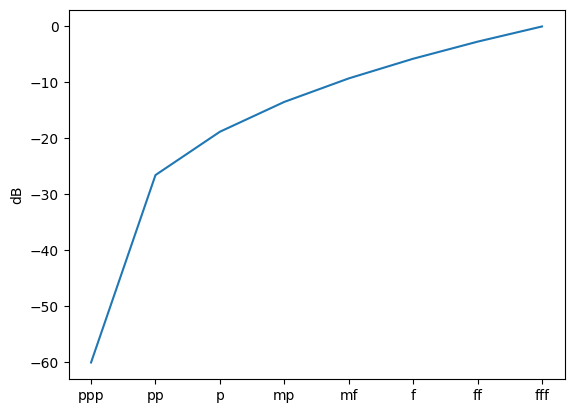

In [13]:
w.dynamicCurve.plot()

### Testing dynamics

**Luciano Berio, "O King"**

![](assets/oking1.png)

In [14]:
# Reset any active scorestruct to the default
events = [
    "4F:4:ff",
    "4A:2.5:pp",
    "4F:0",    # dur=0 indicates a grace note
    "4A:1:pp",
    "4B:3",
    "5C#:3",
    "4F:3",
    "4A:2:ff",
    "4F:0:pp",
    "4A:1.5:pp",
    "4Ab:1.5",
    "4Bb:1",
    "5D:.5",
    "5C#:2",
    "4B:1.5:ff",
    "4F:2.5:pp"
]
voice = Chain(events)


Set the score structure to match the original. Either the `.scorestruct` attribute can be modified directly or the function `setScoreStruct` can be used

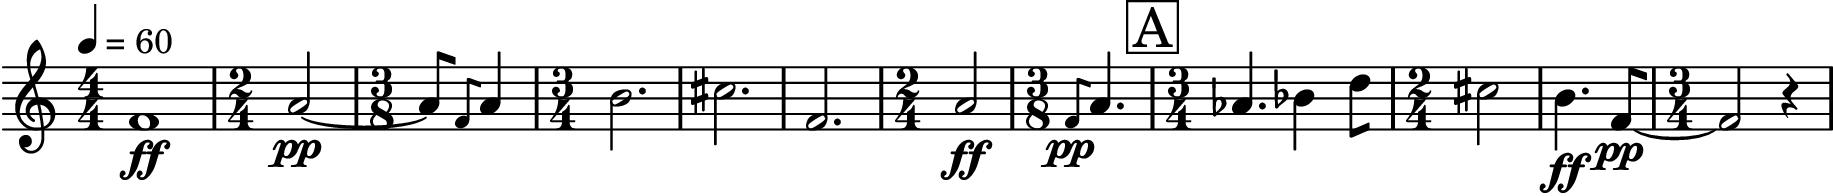

In [15]:
w = getWorkspace()
w.scorestruct = ScoreStruct('''
  4/4, 4=60
  2/4
  3/8
  3/4
  .
  .
  2/4
  3/8
  3/4,label=A
  2/4
  .
  3/4
  4/4
  3/4
  4/4
  3/4
  2/4
  4/4
  .
  2/4,label=B
''')
voice.show()

Play with the default instr (piano, with pedal)

OfflineRenderer(sr=44100)
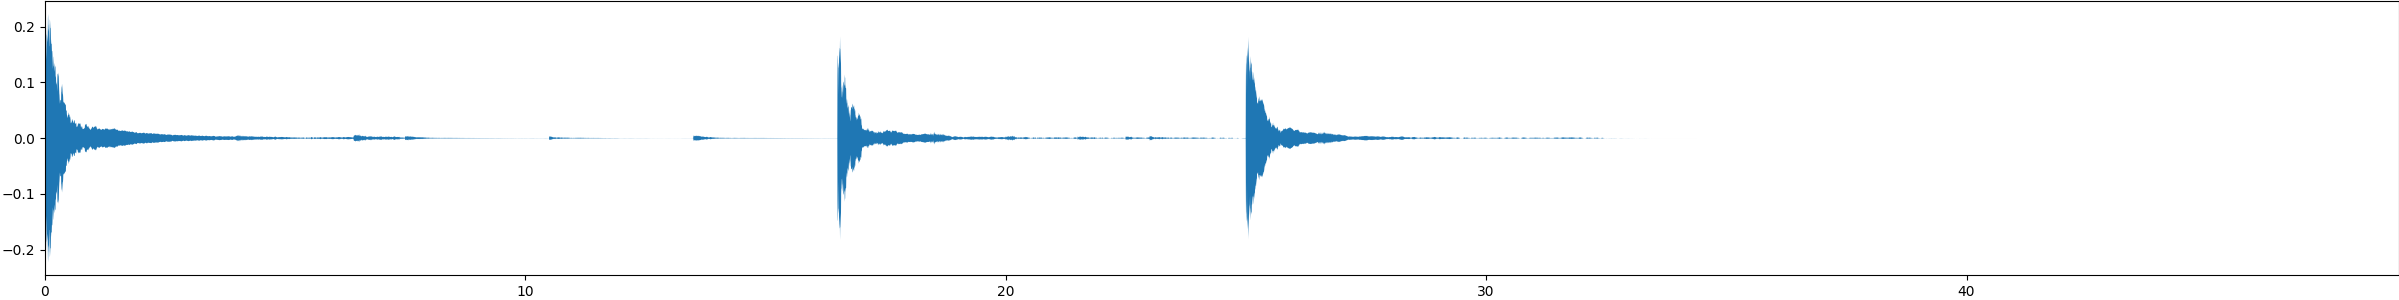

In [16]:
# voice.play(instr='piano', sustain=8, gain=2)

r = voice.rec("tmp/oking.ogg", instr='.piano', sustain=20, nchnls=1, gain=2, fade=(0, 2), kwet=0.8)
r

A dynamic curve with less contrast

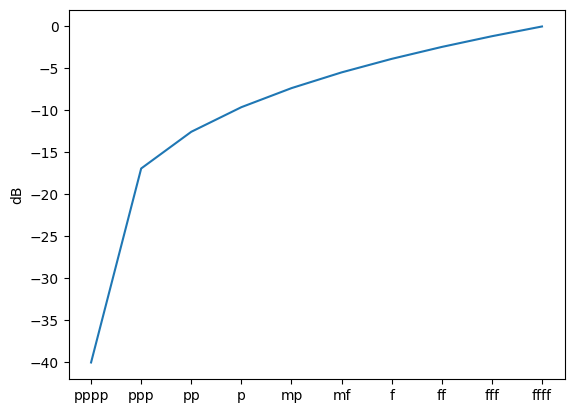

In [17]:
dyncurve = w.setDynamicCurve(shape='expon(0.25)', mindb=-40)
w.dynamicCurve.plot()

OfflineRenderer(sr=44100)
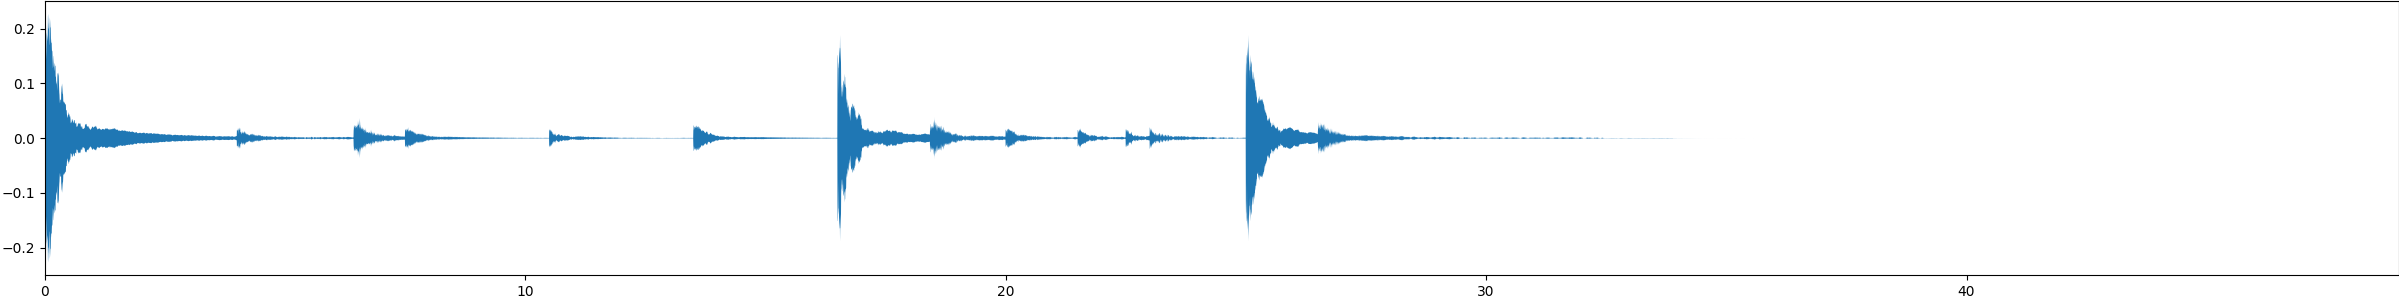

In [18]:
voice.rec(instr='.piano', sustain=20, gain=2, nchnls=1, fade=(0, 2), kwet=0.8).show()